In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
database = pd.read_csv('database/airbnb.csv')

In [53]:
duplicated_rows = database.duplicated()
print(duplicated_rows.any())

False


In [54]:
database.columns

Index(['id', 'title', 'description', 'typeDescription', 'roomType',
       'discountedPrice', 'price', 'originalPrice', 'day5Price', 'url',
       'ratingValue', 'ratingReviewsCount', 'ratingGuestSatisfaction',
       'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy',
       'ratingLocation', 'hostID', 'hostName', 'hostAbout', 'hostRating',
       'hostIsSuper', 'hostTimeResponse', 'hostResponseRate', 'latitude',
       'longitude', 'highlights', 'highlightsHost', 'highlightsLocation',
       'origin'],
      dtype='object')

In [55]:
# Remover "R$" e converter colunas de preço para float
def convert_price(value):
    """Remove o símbolo 'R$' e converte para float"""
    return float(value.replace("R$", "").replace(",", "").strip()) if isinstance(value, str) else value

In [56]:
database['discountedPrice'] = database['discountedPrice'].apply(convert_price)
database['price'] = database['price'].apply(convert_price)
database['originalPrice'] = database['originalPrice'].apply(convert_price)
database['day5Price'] = database['day5Price'].apply(convert_price)

## 1. Mapeamento ##

In [57]:
import folium
from folium.plugins import MarkerCluster

In [58]:
# visualização com base nas médias das latitudes e longitudes
map_center_lat= database['latitude'].mean()
map_center_log= database['longitude'].mean()

#criação e atribuição do mapa a variável map_stm
map_geral = folium.Map((map_center_lat, map_center_log), tiles="cartodb positron", control_scale=True,)
#(latitude,longitude)

In [59]:
marker_cluster = MarkerCluster().add_to(map_geral)

# iterrows() -> (indíce, linha)
for i, row in database.iterrows():
    try: 
        lat = row['latitude']
        lon = row['longitude']

        # verificação se os valores em lat e lon são números e se são int ou float, caso seja avaliado como invalido irá pular (continue) a coordenada da linha
        if pd.isna(lat) or pd.isna(lon) or not (isinstance(lat, (int,float)) and isinstance(lon, (int, float))): 
            continue

        folium.Marker(
            location=[lat, lon],
            icon=folium.Icon(color='blue')
        ).add_to(marker_cluster)

    except (KeyError, TypeError) as e:
        print(f"Erro processando linha de index {i}:{e}")
        continue


In [60]:
map_geral

## 2. Avaliações ##

In [61]:
origin_room_type_counts = database.groupby(['origin', 'roomType']).size().unstack(fill_value=0)
print("Quantidade de tipos de hospedagem por origem:")
print(origin_room_type_counts)

Quantidade de tipos de hospedagem por origem:
roomType  Entire home/apt  Private room  Shared room
origin                                              
blm                   277           130            6
stm                   306           141            6


### Correlação entre Avaliações e Preço ###

In [62]:
database.head(10)

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostRating,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,NaN,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,NaN,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,4.96,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,NaN,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,NaN,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,4.93,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,4.91,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm
5,35282485,Quarto silencioso próximo ao Bosque,Ambiente familiar calmo e aconchegante.O quart...,"Quarto em Marco, Brasil",Private room,NaN,119.0,NaN,505.00,https://www.airbnb.com/rooms/35282485?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.433770,-48.459260,"['No top 5% das acomodações', 'Quarto em apart...","['Idiomas: francês', 'Moro em: State of Pará, ...","['Bairro residencial, tranquilo, com local pró...",blm
6,1327049905751092176,Quarto com excelente localização,Suíte ampla e aconchegante com entrada lateral...,"Quarto em Belém, Brasil",Private room,NaN,145.0,NaN,618.00,https://www.airbnb.com/rooms/13270499057510921...,...,5.00,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.396890,-48.474600,"['Quarto em casa', 'Experiência de check-in ex...","['Nasci na década de 90', 'Meu trabalho: Empre...","[nan, nan]",blm
7,41744419,"STUDIO 306 | WIFI 600MB | RESIDENCIAL JC, um l...","O apartamento 306 é aconchegante, alinhado e o...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,201.0,NaN,995.00,https://www.airbnb.com/rooms/41744419?locale=p...,...,4.93,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.462184,-48.488110,"['Self check-in', 'Ótima localização', 'Cancel...",['Meu trabalho: Jc Residencial e Administração...,['Estamos localizados no coração de Batista Ca...,blm
8,791310251933878840,Quarto na melhor localização,Sejam bem-vindos! 🤍 LEIA A ABA REGRAS DA CASA ...,"Quarto em Belém, Brasil",Private room,62.0,62.0,75.0,330.00,https://www.airbnb

In [63]:
database['originalPrice'] = database['originalPrice'].fillna(database['price'])

In [64]:
database

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostRating,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.000,423.000,1.710,https://www.airbnb.com/rooms/23562655?locale=p...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.000,518.000,2.060,https://www.airbnb.com/rooms/91296753376758295...,...,4.96,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.000,135.000,575.000,https://www.airbnb.com/rooms/12538779015080127...,...,4.90,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.000,135.000,530.000,https://www.airbnb.com/rooms/10059376180958668...,...,4.93,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.000,78.000,330.000,https://www.airbnb.com/rooms/13103943459383978...,...,4.91,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1328353590628975017,Alterlar Casa de Praia em Alter do Chão,Opção perfeita para você e sua família que que...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,843.0,1.023,1.023,4.500,https://www.airbnb.com/rooms/13283535906289750...,...,0.00,False,NaN,NaN,-2.502640,-54.945950,"['Caminhada de 1 minuto até o lago', 'Comodida...","['Meu trabalho: Dentista', nan, nan, nan, nan]","[nan, nan]",stm
862,45629422,Casa em Alter do Chão no Centro acesso as praias.,- Garagem pra 3 carros;- Quarto 1 com uma cama...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,3.000,https://www.airbnb.com/rooms/45629422?locale=p...,...,4.89,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.503330,-54.953490,"['Fique no fresquinho', 'Comodidades ao ar liv...","['Moro em: Santarém, Brasil', nan, nan, nan, nan]","['A casa fica no centro de Alter do Chão, na r...",stm
863,1091261682652318404,Suíte casal,Este lugar cheio de estilo fica perto de desti...,"Quarto em hotel em Santarém, Brasil",Private room,348.0,421.000,421.000,1.830,https://www.airbnb.com/rooms/10912616826523184...,...,5.00,False,Responde em até um dia,Taxa de resposta: 67%,-2.511220,-54.949550,"['Self check-in', 'Comodidades ao ar livre', '...","['Nasci na década de 70', 'Onde estudei: Unive...","[nan, nan]",stm
864,1198601539719395137,Sobrado Alter.,Abrace a natureza sem abrir mão do conforto e ...,"Espaço intei

In [66]:
correlation_price = database[['discountedPrice', 'originalPrice', 'ratingValue']].corr()

print("Correlação entre Preço e Avaliações:")
print(correlation_price)

Correlação entre Preço e Avaliações:
                 discountedPrice  originalPrice  ratingValue
discountedPrice         1.000000       0.679777    -0.109781
originalPrice           0.679777       1.000000    -0.094315
ratingValue            -0.109781      -0.094315     1.000000


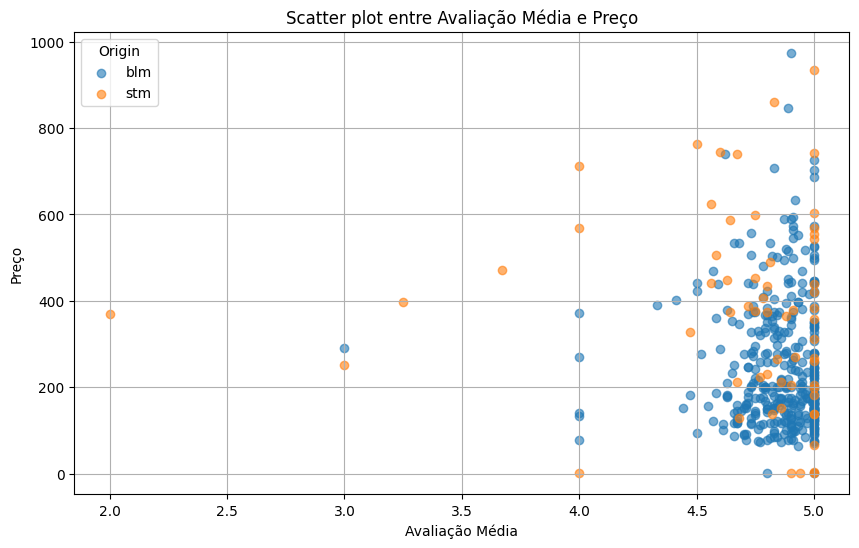

In [68]:
# Scatter plot entre ratingValue e originalPrice
plt.figure(figsize=(10, 6))
for origin in database['origin'].unique():
    subset = database[database['origin'] == origin]
    plt.scatter(subset['ratingValue'], subset['originalPrice'], label=origin, alpha=0.6)

plt.title('Scatter plot entre Avaliação Média e Preço')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

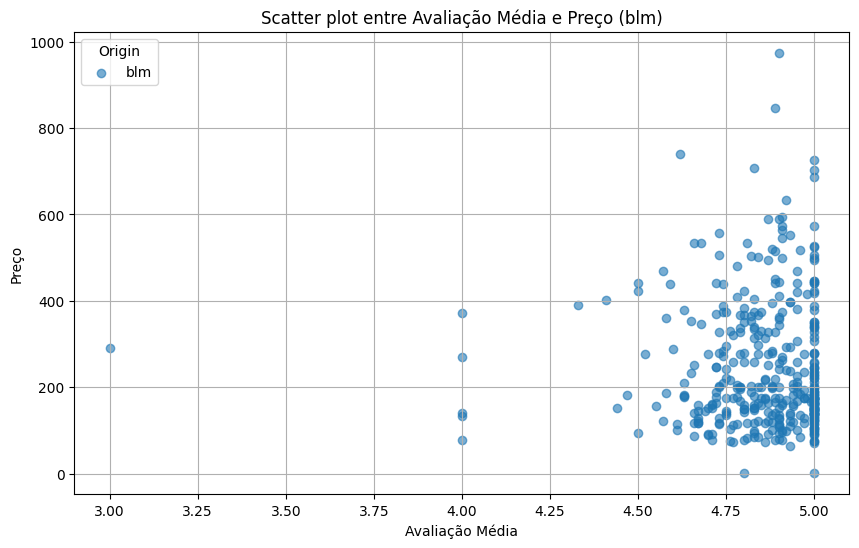

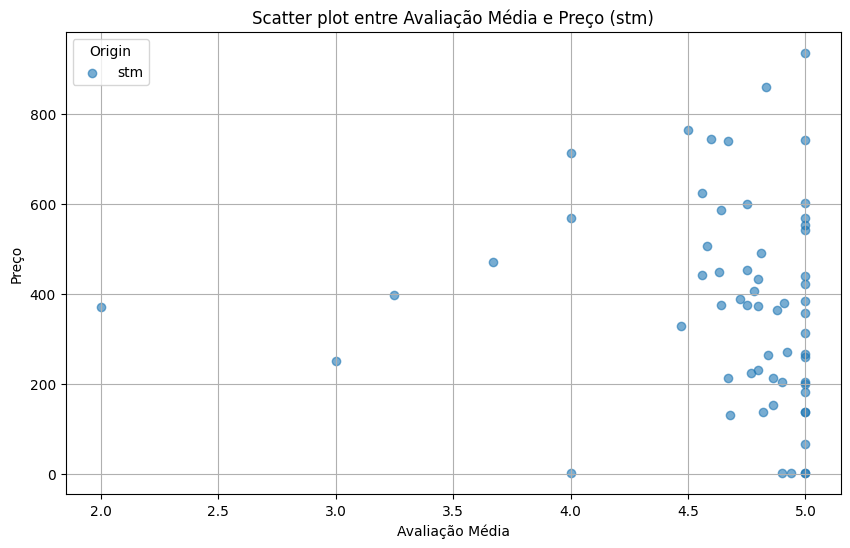

In [69]:
# Filtrar dados para origin == 'blm' e origin == 'stm'
blm_data = database[database['origin'] == 'blm']
stm_data = database[database['origin'] == 'stm']

# Gráfico de dispersão para origin == 'blm'
plt.figure(figsize=(10, 6))
plt.scatter(blm_data['ratingValue'], blm_data['originalPrice'], label='blm', alpha=0.6)
plt.title('Scatter plot entre Avaliação Média e Preço (blm)')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

# Gráfico de dispersão para origin == 'stm'
plt.figure(figsize=(10, 6))
plt.scatter(stm_data['ratingValue'], stm_data['originalPrice'], label='stm', alpha=0.6)
plt.title('Scatter plot entre Avaliação Média e Preço (stm)')
plt.xlabel('Avaliação Média')
plt.ylabel('Preço')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

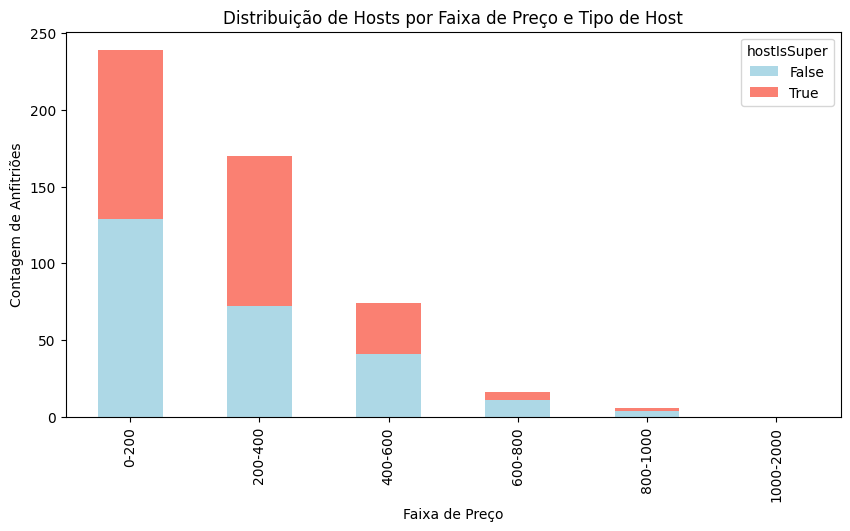

In [79]:
# Classificando as faixas de preço
database['priceCategory'] = pd.cut(database['originalPrice'], bins=[0, 200, 400, 600, 800, 1000, 2000], labels=['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-2000'])

# Gráfico de Barras Empilhadas
price_stack = database.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host')
plt.show()

## 3. Distribuição dos Preços das Hospedagens ##

In [80]:
import statsmodels.api as sm

# Selecionar as colunas de características e a coluna alvo
X = database[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y = database.loc[X.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          3.04e-186
Time:                        21:33:14   Log-Likelihood:                 296.18
No. Observations:                 726   AIC:                            -576.4
Df Residuals:                     718   BIC:                            -539.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

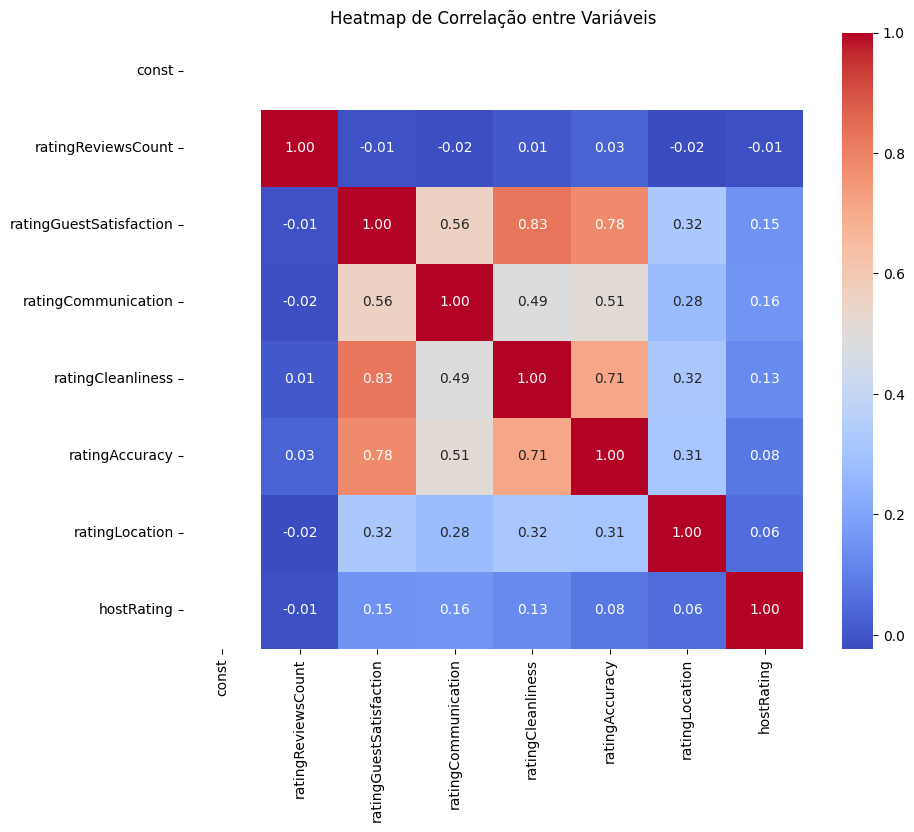

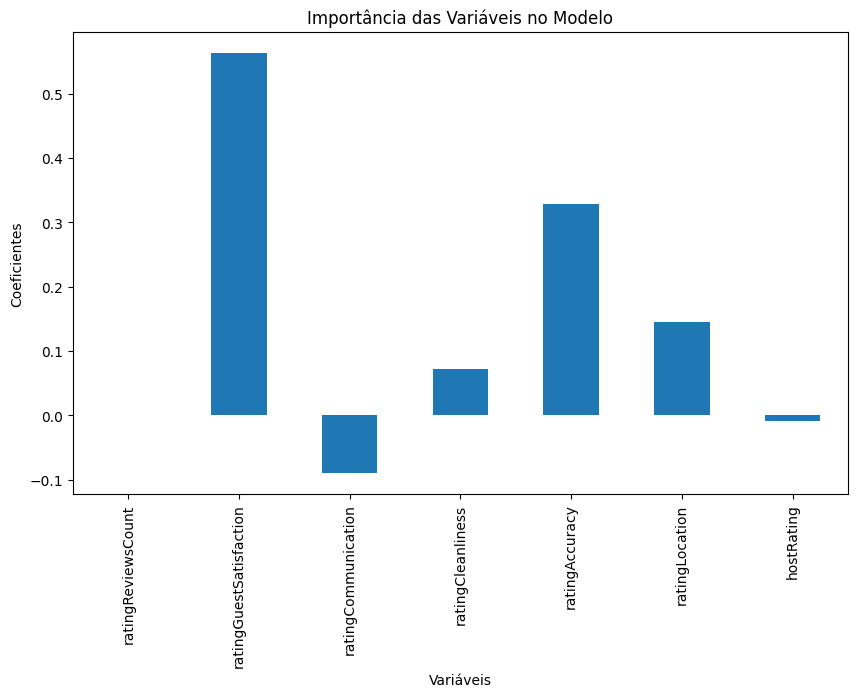

In [83]:
# 1. Correlação entre as variáveis (heatmap)
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()

# 2. Importância das variáveis no modelo (gráfico de barras)
coefficients = model.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()


                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     156.8
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          4.12e-102
Time:                        21:51:26   Log-Likelihood:                 94.519
No. Observations:                 346   AIC:                            -173.0
Df Residuals:                     338   BIC:                            -142.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

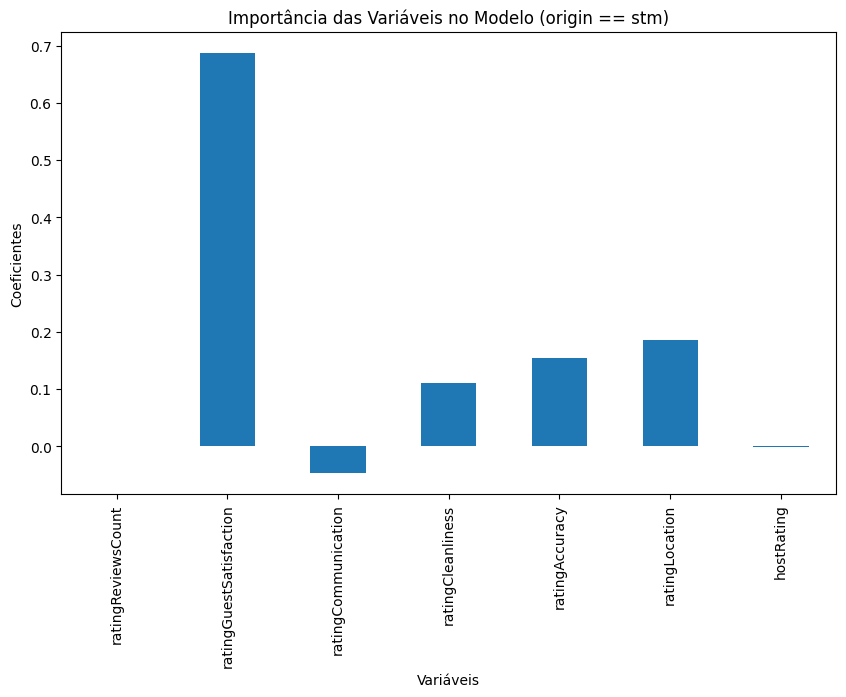

In [84]:
# Filtrar dados para origin == 'stm'
stm_data = database[database['origin'] == 'stm']

# Selecionar as colunas de características e a coluna alvo
X_stm = stm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_stm = stm_data.loc[X_stm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_stm = sm.add_constant(X_stm)

# Ajustar o modelo de regressão linear múltipla
model_stm = sm.OLS(y_stm, X_stm).fit()

# Exibir o resumo do modelo
print(model_stm.summary())

# Importância das variáveis no modelo (gráfico de barras)
coefficients_stm = model_stm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_stm.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo (origin == stm)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            ratingValue   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     67.08
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           3.90e-62
Time:                        21:52:18   Log-Likelihood:                 249.89
No. Observations:                 380   AIC:                            -483.8
Df Residuals:                     372   BIC:                            -452.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

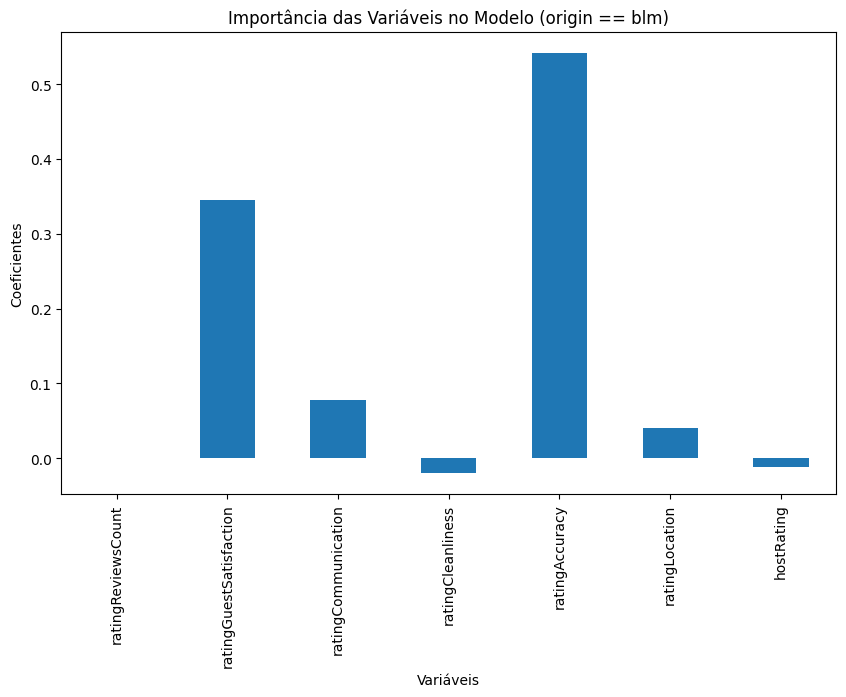

In [85]:
# Filtrar dados para origin == 'blm'
blm_data = database[database['origin'] == 'blm']

# Selecionar as colunas de características e a coluna alvo
X_blm = blm_data[['ratingReviewsCount', 'ratingGuestSatisfaction', 'ratingCommunication', 'ratingCleanliness', 'ratingAccuracy', 'ratingLocation', 'hostRating']].dropna()
y_blm = blm_data.loc[X_blm.index, 'ratingValue']

# Adicionar uma constante para o intercepto
X_blm = sm.add_constant(X_blm)

# Ajustar o modelo de regressão linear múltipla
model_blm = sm.OLS(y_blm, X_blm).fit()

# Exibir o resumo do modelo
print(model_blm.summary())

# Importância das variáveis no modelo (gráfico de barras)
coefficients_blm = model_blm.params[1:]  # Excluindo a constante
plt.figure(figsize=(10, 6))
coefficients_blm.plot(kind='bar')
plt.title('Importância das Variáveis no Modelo (origin == blm)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.show()

In [95]:
# Calcular a média de preço por tipo de hospedagem
mean_price_by_room_type = database.groupby('roomType')['originalPrice'].mean()
print("Média de preço por tipo de hospedagem:")
print(mean_price_by_room_type)

# Calcular a faixa de preço por tipo de hospedagem
price_range_by_room_type = database.groupby('roomType')['originalPrice'].agg(['min', 'max'])
print("\nFaixa de preço por tipo de hospedagem:")
print(price_range_by_room_type)

Média de preço por tipo de hospedagem:
roomType
Entire home/apt    309.788432
Private room       184.440252
Shared room        107.375000
Name: originalPrice, dtype: float64

Faixa de preço por tipo de hospedagem:
                    min    max
roomType                      
Entire home/apt   1.023  973.0
Private room     64.000  928.0
Shared room      74.000  138.0


C:\Users\gabid\AppData\Local\Temp\ipykernel_17588\3969119736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blm_data['priceCategory'] = pd.cut(blm_data['originalPrice'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+'])
C:\Users\gabid\AppData\Local\Temp\ipykernel_17588\3969119736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stm_data['priceCategor

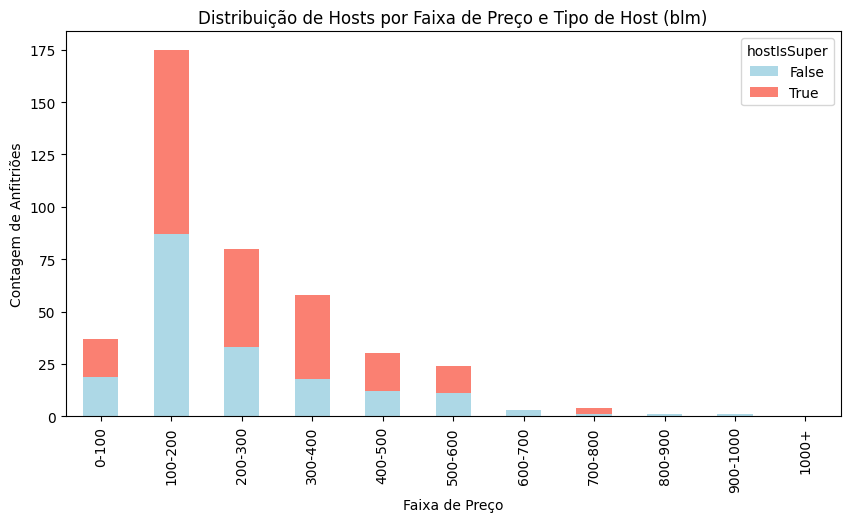

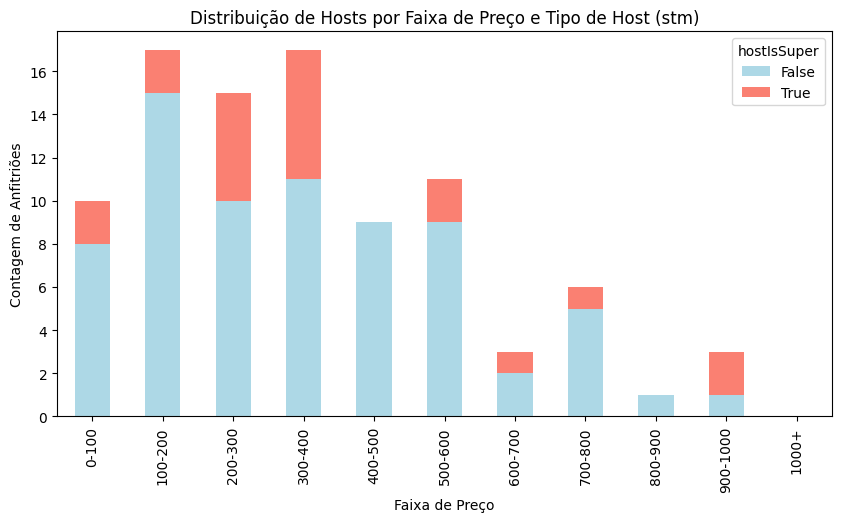

In [96]:
# Classificando as faixas de preço levando em conta a coluna origin
blm_data['priceCategory'] = pd.cut(blm_data['originalPrice'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+'])
stm_data['priceCategory'] = pd.cut(stm_data['originalPrice'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+'])

# Gráfico de Barras Empilhadas para blm
price_stack_blm = blm_data.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack_blm.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host (blm)')
plt.show()

# Gráfico de Barras Empilhadas para stm
price_stack_stm = stm_data.groupby(['priceCategory', 'hostIsSuper'], observed=False).size().unstack().fillna(0)
price_stack_stm.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightblue', 'salmon'])
plt.xlabel('Faixa de Preço')
plt.ylabel('Contagem de Anfitriões')
plt.title('Distribuição de Hosts por Faixa de Preço e Tipo de Host (stm)')
plt.show()

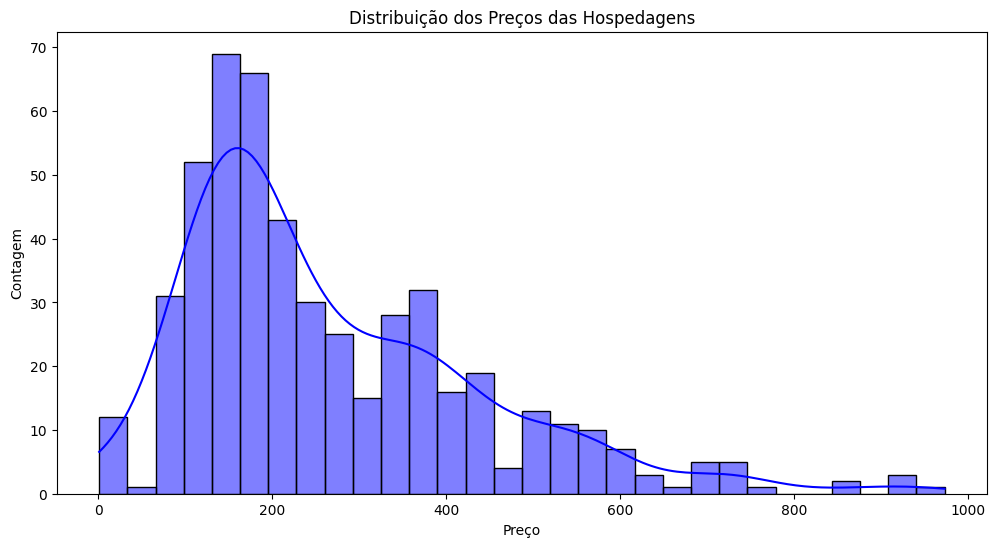

In [ ]:
# Distribuição dos Preços das Hospedagens
plt.figure(figsize=(12, 6))
sns.histplot(database['originalPrice'], bins=30, kde=True, color='blue')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição dos Preços das Hospedagens')
plt.show()


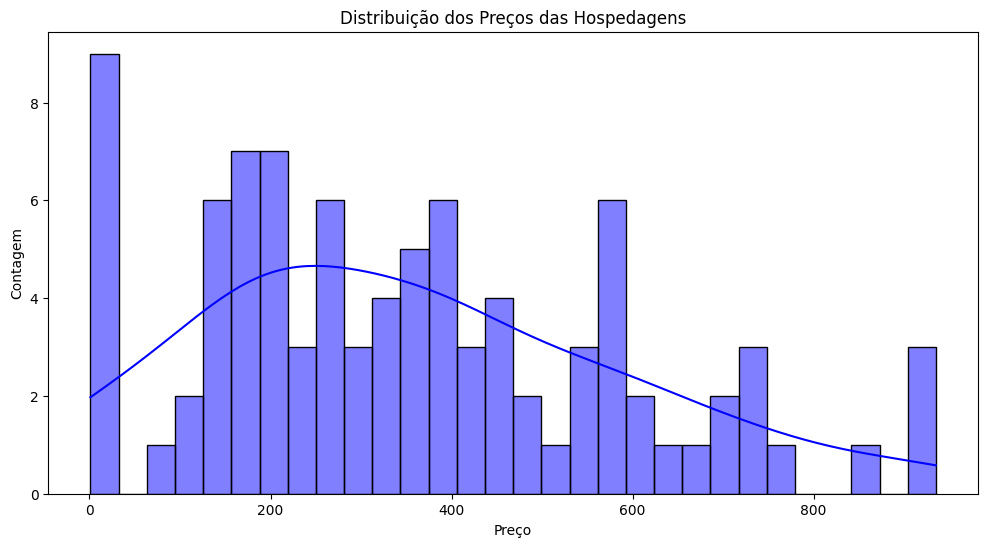

In [105]:
plt.figure(figsize=(12, 6))
sns.histplot(stm_data['originalPrice'], bins=30, kde=True, color='blue')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição dos Preços das Hospedagens')
plt.show()

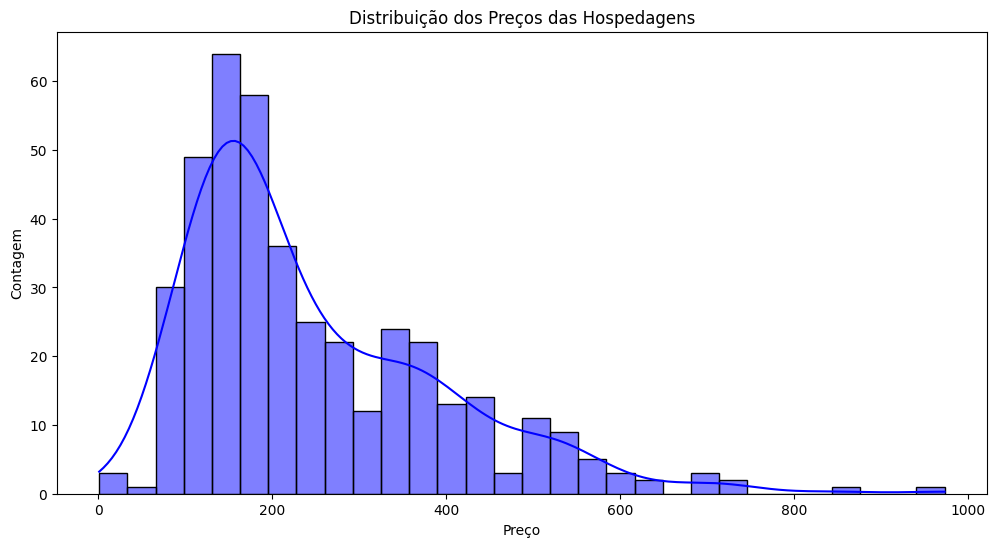

In [106]:
plt.figure(figsize=(12, 6))
sns.histplot(blm_data['originalPrice'], bins=30, kde=True, color='blue')
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Distribuição dos Preços das Hospedagens')
plt.show()

In [86]:
database.head()

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,423.0,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,518.0,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,135.0,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,135.0,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,0-200
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-200


In [87]:
blm_data

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,23562655,Sofisticado Loft Mobiliado no Coração do Umarizal,"Sofisticado Loft de 52 m2, no coração do Bairr...","Espaço inteiro: loft em Belém, Brasil",Entire home/apt,NaN,423.0,423.0,1.71,https://www.airbnb.com/rooms/23562655?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.445973,-48.484032,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,912967533767582954,"bela vista, ótima localização, conforto","AP 1/4 moderno, aconchegante, em local seguro ...","Espaço inteiro: apartamento em Belém, Brasil",Entire home/apt,NaN,518.0,518.0,2.06,https://www.airbnb.com/rooms/91296753376758295...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.441200,-48.491050,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,1253877901508012768,Quarto e cozinha bem localizado acesso individ...,Local privilegiado com entrada independente. O...,"Espaço inteiro: casa em Belém, Brasil",Entire home/apt,NaN,135.0,135.0,575.00,https://www.airbnb.com/rooms/12538779015080127...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.443930,-48.485570,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200
3,1005937618095866893,Quarto com vista para o rio,"O apartamento é simples, mas arejado e ilumina...","Quarto em Belém, Brasil",Private room,NaN,135.0,135.0,530.00,https://www.airbnb.com/rooms/10059376180958668...,...,True,Responde em poucas horas,Taxa de resposta: 100%,-1.455178,-48.496070,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,0-200
4,1310394345938397835,Suíte somente para você no bairro Marambaia.,Uma suíte somente para você no bairro Marambai...,"Microcasa em Belém, Brasil",Entire home/apt,69.0,69.0,78.0,330.00,https://www.airbnb.com/rooms/13103943459383978...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-1.413707,-48.439612,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1258296442738604234,Charmoso Retiro Perto de Tudo,Aconchegante e bem localizado próximo à Basíli...,"Quarto em Belém, Brasil",Private room,NaN,94.0,94.0,400.00,https://www.airbnb.com/rooms/12582964427386042...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.447240,-48.477940,"['Quarto em casa', 'Muitas atividades por pert...","['Nasci na década de 80', 'Meu trabalho: Profe...","[nan, nan]",blm,0-200
409,1238729804435057749,Quarto em localização ideal,Quarto privativo e aconchegante com banheiro c...,"Quarto em Belém, Brasil",Private room,NaN,110.0,110.0,550.00,https://www.airbnb.com/rooms/12387298044350577...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.468204,-48.487405,"['No top 10% das acomodações', 'Quarto em apar...","['Nasci na década de 90', 'Idiomas: inglês e p...","[nan, nan]",blm,0-200
410,52515419,Quarto em casa com terraço,"Prezo pelo conforto e bem-estar, para que o hó...","Quarto em Terra Firme, Brasil",Private room,NaN,80.0,80.0,290.00,https://www.airbnb.com/rooms/52515419?locale=p...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-1.453970,-48.451570,"['Quarto em casa', 'Ótima experiência de check...","['Nasci na década de 80', 'Onde estudei: Unive...","['Resido no bairro a mais de 30 anos, tudo mui...",blm,0-200
411,31324117,Apto/casa Centro de Belém,Atenção. Não cobramos taxa de limpeza.Ao fazer...,"Espaço inteiro: casa em Belém, Brasil",Entire hom

In [88]:
stm_data

,id,title,description,typeDescription,roomType,discountedPrice,price,originalPrice,day5Price,url,...,hostIsSuper,hostTimeResponse,hostResponseRate,latitude,longitude,highlights,highlightsHost,highlightsLocation,origin,priceCategory
413,1284848925482673940,Flat Paraíso da praia 20324,Relaxe neste espaço calmo e cheio de estilo. A...,"Espaço inteiro: apartamento em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,1.250,https://www.airbnb.com/rooms/12848489254826739...,...,True,Responde em poucas horas,Taxa de resposta: 100%,-2.506643,-54.958631,"['Comodidades ao ar livre', 'Self check-in', '...","['Meu trabalho: Administradora', 'Moro em: San...","[nan, nan]",stm,NaN
414,1170406999244775557,Quarto Muiraquitã •\nCasa AmazôniKaa,Este lugar especial é muito bem localizado pró...,"Quarto em Santarém, Brasil",Private room,235.0,267.000,267.000,1.000,https://www.airbnb.com/rooms/11704069992447755...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-2.503780,-54.951200,"['Quarto em casa', 'Caminhada de 4 minutos até...","['Meu trabalho: Guia de Turismo', 'Passo muito...","[nan, nan]",stm,200-400
415,1290829230739229679,Quarto Triplo 2-Pousada Orquídea,"Localizada no centro de Alter do Chão, a 500 ...","Quarto em Santarém, Brasil",Private room,NaN,NaN,NaN,800.000,https://www.airbnb.com/rooms/12908292307392296...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.506362,-54.954638,"['Quarto em pousada', 'Comodidades ao ar livre...","['Onde estudei: UFMT', 'Meu trabalho: Engenhei...","[nan, nan]",stm,NaN
416,763165324786463468,Pousada cardume,Tudo o que você quer explorar está a um passo ...,"Quarto em Santarém, Brasil",Private room,NaN,NaN,NaN,650.000,https://www.airbnb.com/rooms/76316532478646346...,...,True,Responde em até 1 hora,Taxa de resposta: 100%,-2.510813,-54.955368,"['Ótima experiência de check-in', 'Quarto em p...","['Nasci na década de 80', 'Onde estudei: unino...","[nan, nan]",stm,NaN
417,963094139487772842,Quarto Tarubá,Em Alter do chão 🏡850 metros da Ilha do Amor e...,"Quarto em Santarém, Brasil",Private room,NaN,NaN,NaN,285.000,https://www.airbnb.com/rooms/96309413948777284...,...,True,Responde em até 1 hora,Taxa de resposta: 99%,-2.503500,-54.958700,"['Quarto em casa', 'Self check-in', 'Cancelame...","['Meu trabalho: airbnb', 'Idiomas: português',...","[nan, nan]",stm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1328353590628975017,Alterlar Casa de Praia em Alter do Chão,Opção perfeita para você e sua família que que...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,843.0,1.023,1.023,4.500,https://www.airbnb.com/rooms/13283535906289750...,...,False,NaN,NaN,-2.502640,-54.945950,"['Caminhada de 1 minuto até o lago', 'Comodida...","['Meu trabalho: Dentista', nan, nan, nan, nan]","[nan, nan]",stm,0-200
862,45629422,Casa em Alter do Chão no Centro acesso as praias.,- Garagem pra 3 carros;- Quarto 1 com uma cama...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,3.000,https://www.airbnb.com/rooms/45629422?locale=p...,...,False,Responde em até 1 hora,Taxa de resposta: 100%,-2.503330,-54.953490,"['Fique no fresquinho', 'Comodidades ao ar liv...","['Moro em: Santarém, Brasil', nan, nan, nan, nan]","['A casa fica no centro de Alter do Chão, na r...",stm,NaN
863,1091261682652318404,Suíte casal,Este lugar cheio de estilo fica perto de desti...,"Quarto em hotel em Santarém, Brasil",Private room,348.0,421.000,421.000,1.830,https://www.airbnb.com/rooms/10912616826523184...,...,False,Responde em até um dia,Taxa de resposta: 67%,-2.511220,-54.949550,"['Self check-in', 'Comodidades ao ar livre', '...","['Nasci na década de 70', 'Onde estudei: Unive...","[nan, nan]",stm,400-600
864,1198601539719395137,Sobrado Alter.,Abrace a natureza sem abrir mão do conforto e ...,"Espaço inteiro: casa em Santarém, Brasil",Entire home/apt,NaN,NaN,NaN,2.958,https://www.airbnb.com/rooms/11986015397193951...,...,False,NaN,NaN,-2.506903,-54.948751,"['Fique no fres

### Localização ###

In [89]:
from sklearn.cluster import KMeans

In [90]:
df_location = stm_data[['id','latitude','longitude']].copy()
df_location.head()

,id,latitude,longitude
413,1284848925482673940,-2.506643,-54.958631
414,1170406999244775557,-2.503780,-54.951200
415,1290829230739229679,-2.506362,-54.954638
416,763165324786463468,-2.510813,-54.955368
417,963094139487772842,-2.503500,-54.958700


In [94]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 413 to 865
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         453 non-null    int64  
 1   latitude   453 non-null    float64
 2   longitude  453 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 30.3 KB


In [97]:
# retirar valores nulos
df_location.dropna(axis=0,how='any',subset=['latitude','longitude'],inplace=True)
df_location.describe()

,id,latitude,longitude
count,4.530000e+02,453.000000,453.000000
mean,8.411872e+17,-2.486526,-54.882484
std,5.147855e+17,0.037381,0.104856
min,7.852749e+06,-2.669693,-55.202598
25%,5.621349e+17,-2.508269,-54.954110
50%,1.065212e+18,-2.505400,-54.947190
75%,1.281902e+18,-2.443978,-54.744361
max,1.355239e+18,-2.384414,-54.685053


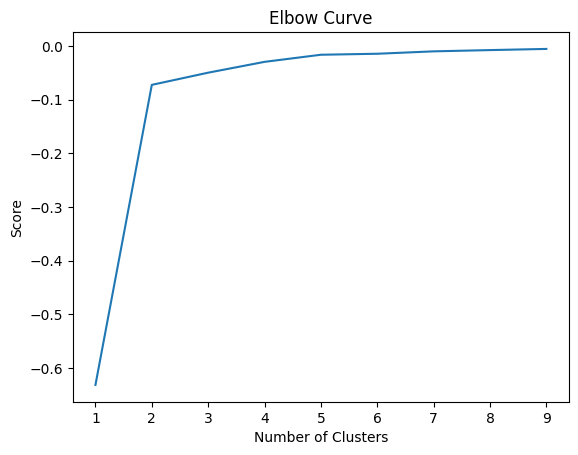

In [98]:
X=df_location.loc[:,['id','latitude','longitude']]

# Elbow Curve
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_location[['latitude']]
X_axis = df_location[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [99]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,id,latitude,longitude,cluster_label
413,1284848925482673940,-2.506643,-54.958631,0
414,1170406999244775557,-2.503780,-54.951200,0
415,1290829230739229679,-2.506362,-54.954638,0
416,763165324786463468,-2.510813,-54.955368,0
417,963094139487772842,-2.503500,-54.958700,0
418,925416981978176829,-2.501740,-54.948860,0
419,977645592663037493,-2.505468,-54.948459,0
420,708138361324411765,-2.505640,-54.957690,0
421,715183140964611968,-2.501770,-54.954950,0
422,40060640,-2.503850,-54.952210,0


In [100]:
loc_type_counts = X['cluster_label'].value_counts()
print("Quantidade por local:")
print(loc_type_counts)

Quantidade por local:
cluster_label
0    312
1    141
Name: count, dtype: int64


In [103]:
# Create a map centered around the mean latitude and longitude
map_center = [X['latitude'].mean(), X['longitude'].mean()]
map_clusters = folium.Map(location=map_center, zoom_start=12, tiles='cartodb positron')

# Add points to the map
for idx, row in X.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='green' if row['cluster_label'] == 0 else 'red',
        fill=True,
        fill_color='green' if row['cluster_label'] == 0 else 'red',
        fill_opacity=0.6
    ).add_to(map_clusters)

#Add cluster centers to the map

for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        icon=folium.Icon(color='black')
    ).add_to(map_clusters)

# Display the map
map_clusters

## 4. Processamento de Texto ##

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# texto em números --> TF-ID (Term Frequency - Inverse Document Frequency) --> quanto mais vezes uma palavra aparece em um documento e menos vezes em outros, mais importante ela é.

from sklearn.decomposition import TruncatedSVD #reduzir complexidade de dados
import nltk
from nltk.corpus import stopwords

In [114]:
# Português-Brasil
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

#stop_words_custom = ['de', 'para', 'com', 'o', 'a', 'os', 'as', 'não', 'é', 'ser', 'estar']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
# Carregar as stopwords em português
custom_stop_words_pt = set(stopwords.words('portuguese'))  # Converte para conjunto (evita duplicatas)

# Lista de novas
novas_stopwords = {'nan'}

custom_stop_words_pt.update(novas_stopwords)
custom_stop_words_pt = list(custom_stop_words_pt)

In [127]:
# Extrair as colunas relevantes
df_relevant = database[['ratingValue', 'originalPrice', 'highlights', 'highlightsHost', 'highlightsLocation', 'origin', 'priceCategory']].copy()

df_relevant.head()

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,"['Aproveite para dar um mergulho', 'Academia e...","['Idiomas: inglês, francês, português e espanh...",['O bairro do Umarizal é o mais nobre da cidad...,blm,400-600
1,4.96,518.0,"['No top 10% das acomodações', 'Comodidades ao...","['Moro em: Belém, Brasil', nan, nan, nan, nan]","['bairro nobre, próximo a shopping, supermer...",blm,400-600
2,4.93,135.0,"['Experiência de check-in excepcional', 'Ótimo...","[nan, nan, nan, nan, nan]","[nan, nan]",blm,0-200
3,4.96,135.0,"['No top 5% das acomodações', 'Quarto em apart...","['Nasci na década de 90', 'Meu trabalho: Bancá...","[nan, nan]",blm,0-200
4,4.80,78.0,"['No top 10% das acomodações', 'Experiência de...","['Meu trabalho: Pereirão/Faz tudo', 'Curiosida...","[nan, nan]",blm,0-200


In [128]:
# Limpar e preprocessar os dados textuais na coluna 'highlights' --> minusculos e sem pontuação (apenas, letras, números ou espaços)
df_relevant['highlights'] = df_relevant['highlights'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)

df_relevant['highlightsHost'] = df_relevant['highlightsHost'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)

df_relevant['highlightsLocation'] = df_relevant['highlightsLocation'].fillna('').str.lower().str.replace(r'[^\w\s]', '', regex=True)

df_relevant.head()

,ratingValue,originalPrice,highlights,highlightsHost,highlightsLocation,origin,priceCategory
0,4.80,423.0,aproveite para dar um mergulho academia em cas...,idiomas inglês francês português e espanhol mo...,o bairro do umarizal é o mais nobre da cidade ...,blm,400-600
1,4.96,518.0,no top 10 das acomodações comodidades ao ar li...,moro em belém brasil nan nan nan nan,bairro nobre próximo a shopping supermercado...,blm,400-600
2,4.93,135.0,experiência de checkin excepcional ótimos rest...,nan nan nan nan nan,nan nan,blm,0-200
3,4.96,135.0,no top 5 das acomodações quarto em apartamento...,nasci na década de 90 meu trabalho bancária mú...,nan nan,blm,0-200
4,4.80,78.0,no top 10 das acomodações experiência de check...,meu trabalho pereirãofaz tudo curiosidade esto...,nan nan,blm,0-200


In [129]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ratingValue         726 non-null    float64 
 1   originalPrice       505 non-null    float64 
 2   highlights          866 non-null    object  
 3   highlightsHost      866 non-null    object  
 4   highlightsLocation  866 non-null    object  
 5   origin              866 non-null    object  
 6   priceCategory       505 non-null    category
dtypes: category(1), float64(2), object(4)
memory usage: 41.8+ KB


In [130]:
# Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words=custom_stop_words_pt)
X_tfidf = vectorizer.fit_transform(df_relevant['highlights'])

# Redução de dimensionalidade com SVD --> 2 componentes (2 colunas)
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X_tfidf)

In [131]:
# Adicionar as componentes SVD ao dataframe
df_relevant['svd_1'] = X_svd[:, 0]
df_relevant['svd_2'] = X_svd[:, 1]
df_relevant['svd_3'] = X_svd[:, 2]

In [132]:
# Obter os termos (palavras) do vocabulário
termos = np.array(vectorizer.get_feature_names_out())

# Obter a matriz de componentes do SVD
componentes = svd.components_

# Para cada componente, pegar as palavras com maior peso
num_palavras = 20  # Número de palavras mais importantes para cada componente

print("🔹 Palavras mais importantes para SVD_1:")
print(termos[np.argsort(-componentes[0])[:num_palavras]])

print("\n🔹 Palavras mais importantes para SVD_2:")
print(termos[np.argsort(-componentes[1])[:num_palavras]])

print("\n🔹 Palavras mais importantes para SVD_3:")
print(termos[np.argsort(-componentes[2])[:num_palavras]])

🔹 Palavras mais importantes para SVD_1:
['livre' 'ar' 'comodidades' 'checkin' 'fique' 'fresquinho' 'self'
 'excepcional' 'experiência' 'cancelamento' 'gratuito' 'quarto' 'antes'
 'casa' 'fev' 'tranquilidade' 'paz' 'acomodações' 'top' 'ótima']

🔹 Palavras mais importantes para SVD_2:
['comodidades' 'ar' 'livre' 'lago' 'caminhada' 'minutos' 'jardim' 'phaty'
 'vista' 'pousada' 'minuto' 'academia' 'vistas' 'praia' 'café' 'elen'
 'compartilhado' 'renata' 'montanha' 'arevalo']

🔹 Palavras mais importantes para SVD_3:
['bemvindos' 'amigos' 'patas' 'quatro' 'excepcional' 'comunicação'
 'anfitrião' 'paz' 'tranquilidade' 'experiência' 'ótima' 'checkin'
 'exclusivo' 'espaço' 'trabalho' 'localização' 'estacione' 'graça'
 'quarto' 'imbatível']


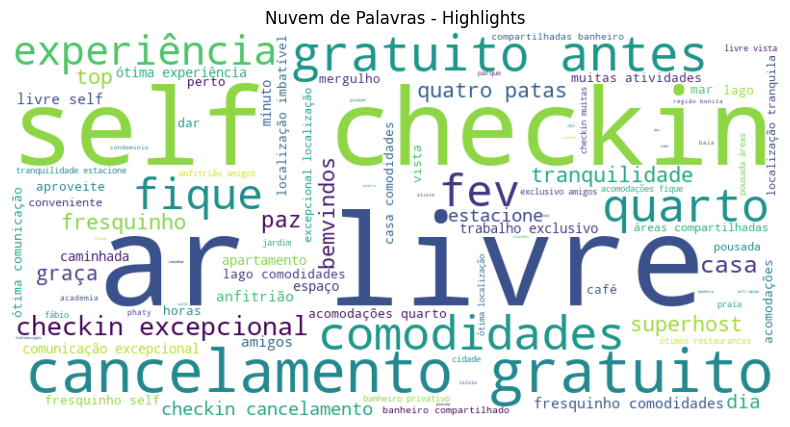

In [134]:
from wordcloud import WordCloud

# Concatenar todos os textos da coluna 'highlights'
text = " ".join(highlight for highlight in df_relevant['highlights'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Highlights')
plt.show()

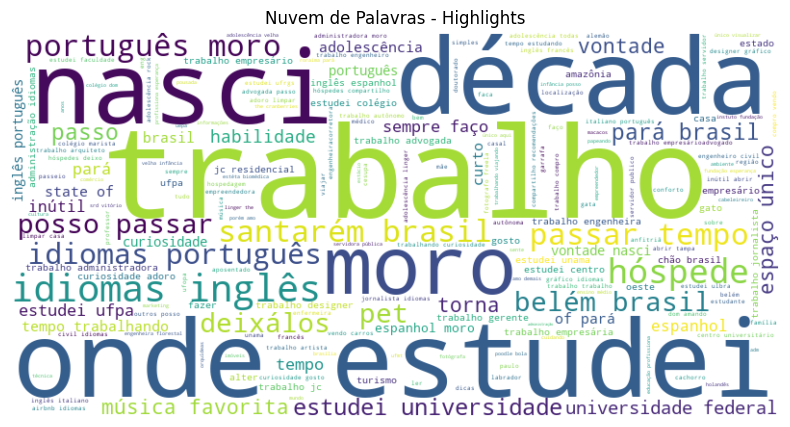

In [135]:
# Concatenar todos os textos da coluna 'highlights'
text = " ".join(highlight for highlight in df_relevant['highlightsHost'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Highlights')
plt.show()

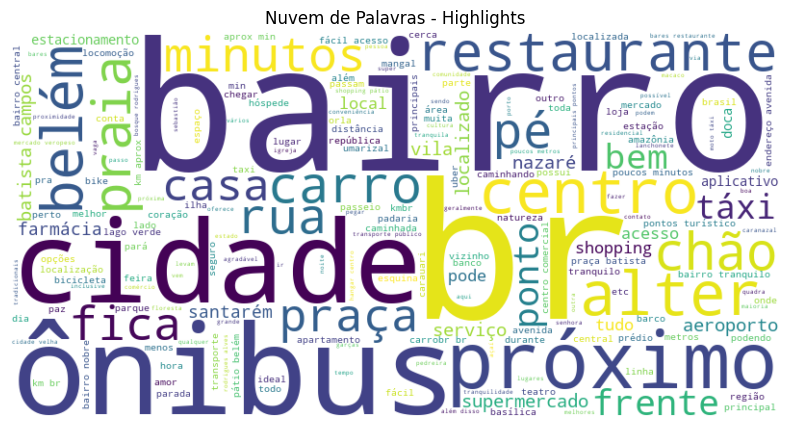

In [136]:
# Concatenar todos os textos da coluna 'highlights'
text = " ".join(highlight for highlight in df_relevant['highlightsLocation'])

# Gerar a nuvem de palavras
wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Highlights')
plt.show()

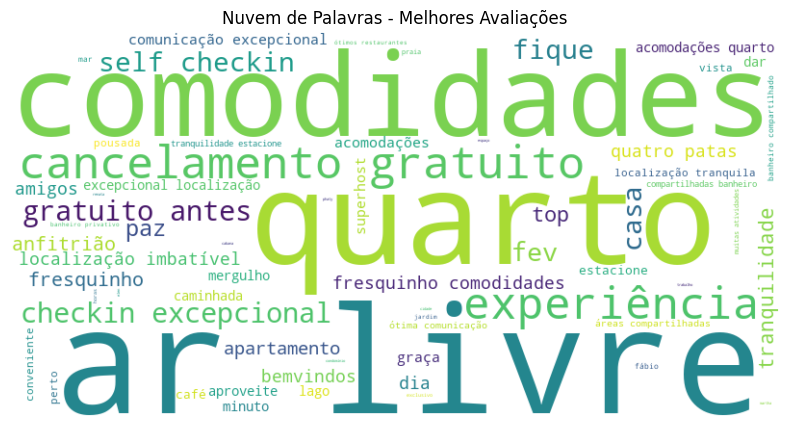

In [137]:
# Filtrar as hospedagens com as melhores avaliações (ratingValue == 5.0)
best_rated = df_relevant[df_relevant['ratingValue'] == 5.0]

# Concatenar todos os textos da coluna 'highlights' das melhores avaliações
best_rated_text = " ".join(highlight for highlight in best_rated['highlights'])

# Gerar a nuvem de palavras
best_rated_wordcloud = WordCloud(stopwords=custom_stop_words_pt, background_color="white", width=800, height=400).generate(best_rated_text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(best_rated_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras - Melhores Avaliações')
plt.show()

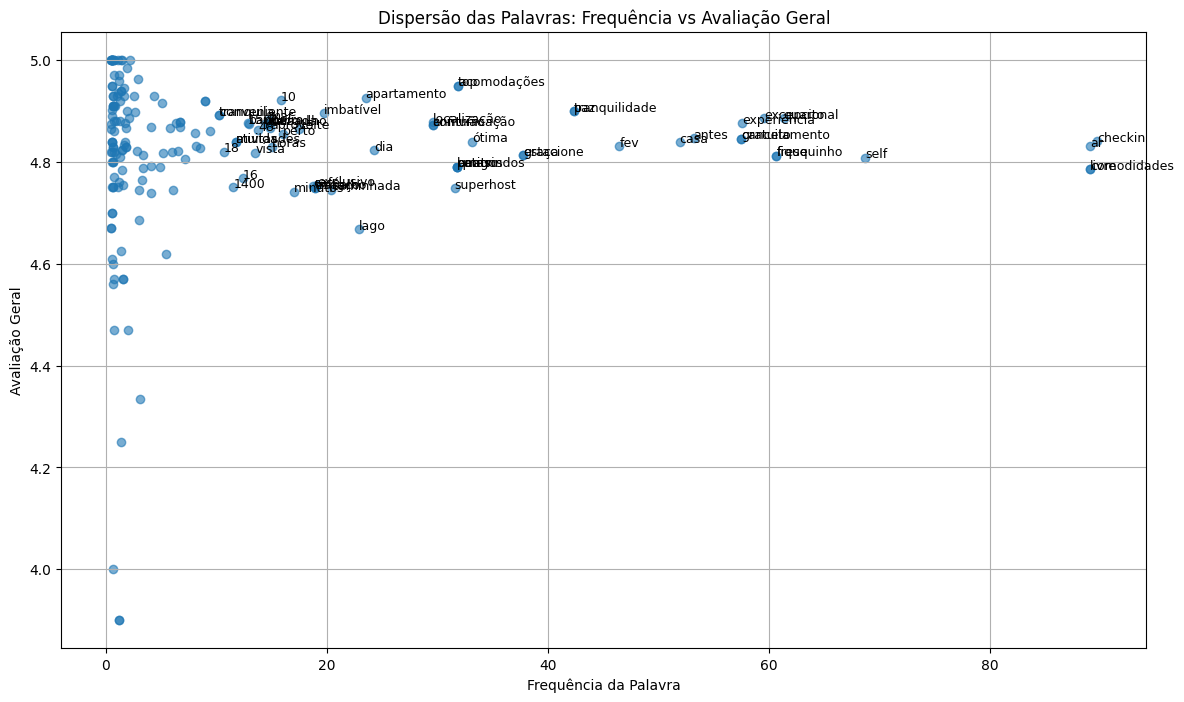

In [138]:
# Obter a frequência das palavras
word_freq = np.asarray(X_tfidf.sum(axis=0)).flatten()

# Criar um DataFrame com as palavras, frequências e avaliações
df_words = pd.DataFrame({'word': termos, 'frequency': word_freq})

# Adicionar a avaliação geral (média) para cada palavra
df_words['rating'] = df_words['word'].apply(lambda word: df_relevant[df_relevant['highlights'].str.contains(word)]['ratingValue'].mean())

# Remover palavras com NaN na avaliação
df_words = df_words.dropna()

# Plotar o gráfico de dispersão
plt.figure(figsize=(14, 8))
plt.scatter(df_words['frequency'], df_words['rating'], alpha=0.6)
plt.title('Dispersão das Palavras: Frequência vs Avaliação Geral')
plt.xlabel('Frequência da Palavra')
plt.ylabel('Avaliação Geral')
plt.grid(True)

# Adicionar rótulos às palavras mais frequentes
for i, row in df_words[df_words['frequency'] > 10].iterrows():
    plt.text(row['frequency'], row['rating'], row['word'], fontsize=9)

plt.show()

### 5. Modelagem de Tópicos ###